
dx =  0.01
Suma de P(x)dx =  0.9999963524247923


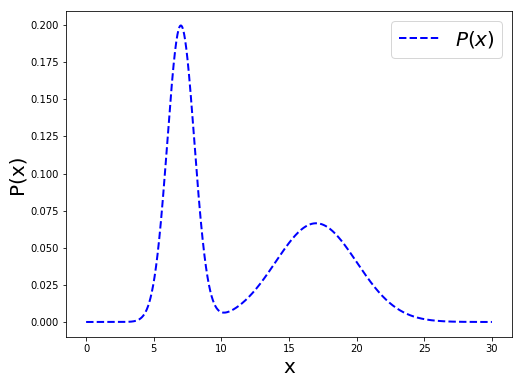

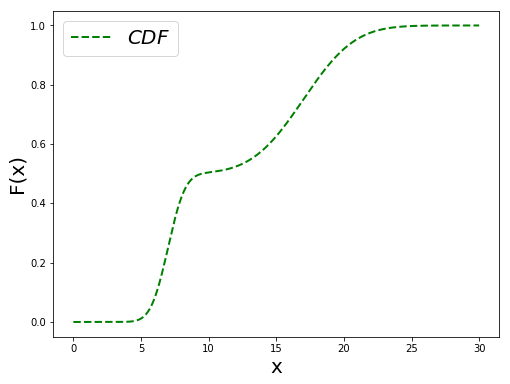

In [179]:
#Gabriel Karim Miranda Carrion        Agosto 2018

import numpy as np
import scipy.integrate as integrate #Integrador
import matplotlib.pyplot as plt #Graficador

data = np.loadtxt('PDF_double_gauss_2018.txt').T  #Lee el archivo y pone las columnas en vectores transpuestos []

x_arr, P_arr = data  #Asocio cada arreglo a su correspondiente 

#print x_arr
#print P_arr
size = len(x_arr) #Tamaño del arreglo x[]

dx_arr = []
for i in range(size-1):
    dx_arr.append(x_arr[i+1]-x_arr[i]) #Resta un dato con el siguiente para obtener dx
    
dx = np.mean(dx_arr)
print 
print 'dx = ', dx

A = sum(P_arr)*dx #Suma los valores del arreglo de P_arr y los multiplica por dx

print 'Suma de P(x)dx = ', A

CDF_arr = np.zeros(size)  #Pone un arreglo de ceros de tamaño "size"
CDF_arr[0]=P_arr[0]*dx    #El valor del primer elemento del arreglo []
for i in range(size-1):                           
    CDF_arr[i+1] = CDF_arr[i] + P_arr[i+1]*dx     #Fórmula recursiva del CDF(x)
              
    
plt.figure(figsize = (8,6))     # Indica el tamaño de la grafica (x,y) 
plt.plot(x_arr, P_arr , linestyle='--' , linewidth=2., color='b', label=r'$P(x)$') # label will be use by plt.legend()
plt.xlabel('x',fontsize=20)
plt.ylabel(r'P(x)',fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()

plt.figure(figsize = (8,6))     # Indica el tamaño de la grafica (x,y) 
plt.plot(x_arr, CDF_arr , linestyle='--' , linewidth=2., color='g', label=r'$CDF$') # label will be use by plt.legend()
plt.xlabel('x',fontsize=20)
plt.ylabel(r'F(x)',fontsize=20)
plt.legend(fontsize=20, loc=2)
plt.show()

[ 7.81 18.87  7.52 ... 17.23  7.61  8.18]


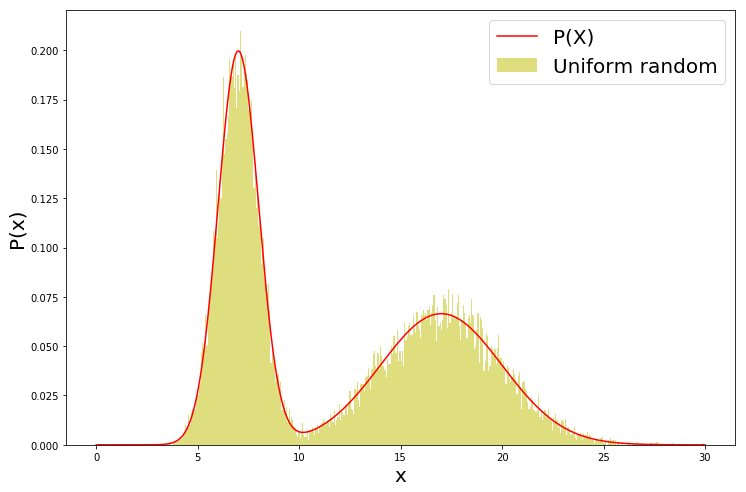

In [180]:
trials_arr = np.random.random(20000) #Genera 20000 números entre 0 y 1 con distribución uniforme.
myrand_arr = np.zeros(20000)

for i in range(20000):
    j=np.argmin(np.abs(CDF_arr - trials_arr[i])) #Número de veces que trials_arr[i] toma algun valor de CDF
    myrand_arr[i]=x_arr[j] 

print myrand_arr
    
plt.figure(figsize = (12,8)) 
plt.hist(myrand_arr, bins=500, range=(0,30), color = 'y', normed=True, alpha=0.5, label='Uniform random')
plt.plot(x_arr, P_arr, linestyle='-', color='r', label='P(X)')
plt.xlabel('x', fontsize=20)
plt.ylabel('P(x)', fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
